As a beginner in data science and exploratory data analysis, I decided to use this datatset to find interesting trends. Using some packages, I was able to construct some plots of such trends. Without further adieu, let us get started!

# Preliminary Set-up
Firstly, we will include the following libraries:

In [3]:
library(tidyverse)
library(rworldmap)

We will also read the .csv file into a tibble using the read_csv function in ggplot2:

In [8]:
data <- read_csv("../input/API_ILO_country_YU.csv")
head(data)

Parsed with column specification:
cols(
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double()
)


Country Name,Country Code,2010,2011,2012,2013,2014
Afghanistan,AFG,20.60000,20.90000,19.70000,21.10000,20.80000
Angola,AGO,10.80000,10.70000,10.70000,10.60000,10.50000
Albania,ALB,25.80000,27.00000,28.30000,28.70000,29.20000
Arab World,ARB,25.02221,28.11752,29.11321,29.33531,29.70457
United Arab Emirates,ARE,9.80000,9.80000,9.80000,9.90000,10.00000
Argentina,ARG,19.50000,18.80000,18.40000,19.70000,21.30000


The head() function allows us to make one important distinction in the data: there are many observations that are not countries. Rather, it is a classification or a regional group. For example, some of the observations include the Arab world and have its own values. This is an important feature of the dataset that we could use in the future.

# Finding trends

## Question 1: How does youth unemployment change over years?

To answer this question, we will take an average of unemployment rates across 2010 to 2014 and plot it as a histogram.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

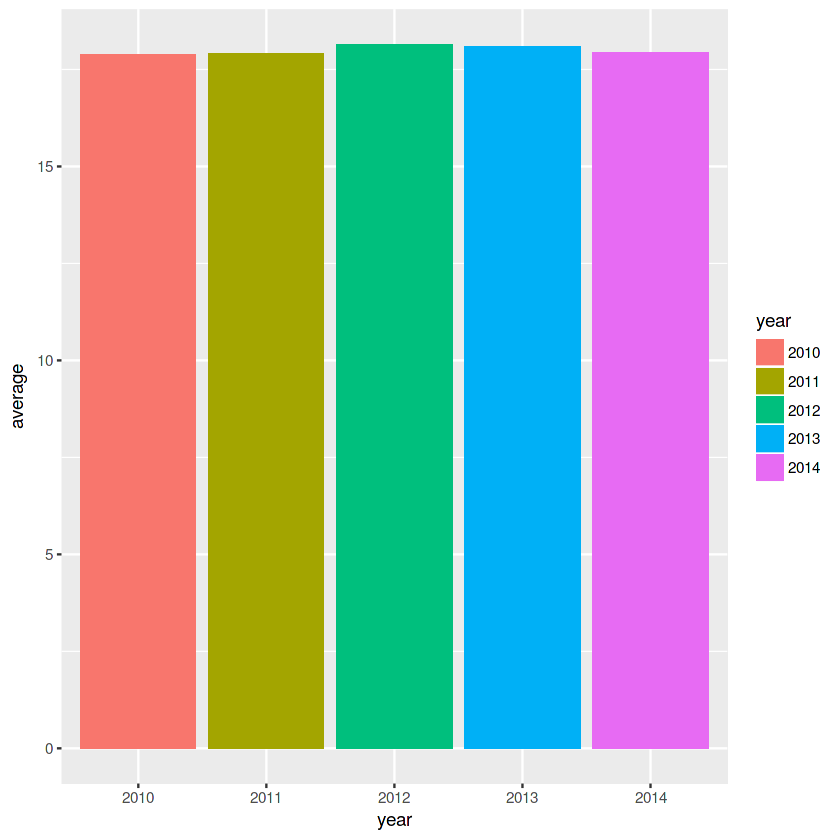

In [9]:
averageYears <- tribble (~year, ~average,
                         "2010", mean(data$"2010"),
                         "2011", mean(data$"2011"),
                         "2012", mean(data$"2012"),
                         "2013", mean(data$"2013"),
                         "2014", mean(data$"2014"))
ggplot(data = averageYears) + geom_histogram(mapping = aes(x = year, y = average, fill = year), stat = "identity")

From the histogram, it is easy to see that global unemployment rates do not change much over the time period of 2010 - 2015. 

## Question 2: How does unemployment rates compare among G7 countries?

Firstly, we must create a vector of all G7 countries, making it easier to select rows that are G7:

In [11]:
g7 <- c("Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States", "European Union")

Now, we must select all observations that are G7 countries. We can use the filter function to select the G7 data. Furthermore, we must calculate the average percentage change in unemployment for each G7 country. Thus, we will create a new tibble using the mutate function. 

In [12]:
pcUnemG7 <- data %>% filter(`Country Name` %in% g7) %>% 
  mutate(averageChange = (`2014` - `2010`)/`2014`)
arrange(pcUnemG7, averageChange)

Country Name,Country Code,2010,2011,2012,2013,2014,averageChange
Japan,JPN,9.10000,8.0000,7.80000,6.80000,6.50000,-0.40000006
United States,USA,18.70000,17.4000,16.50000,15.80000,14.00000,-0.33571434
Germany,DEU,9.70000,8.4000,8.10000,7.80000,7.60000,-0.27631578
United Kingdom,GBR,19.60000,20.1000,21.40000,20.30000,16.70000,-0.17365266
Canada,CAN,14.80000,14.1000,14.30000,13.80000,13.40000,-0.10447766
France,FRA,22.60000,21.9000,23.80000,23.70000,23.90000,0.05439327
European Union,EUU,22.15853,22.7936,25.03259,25.71727,25.11614,0.11775726
Italy,ITA,27.80000,29.1000,35.20000,39.70000,44.10000,0.36961451


Lastly, we will plot the data and come to some conclusions using ggplot2

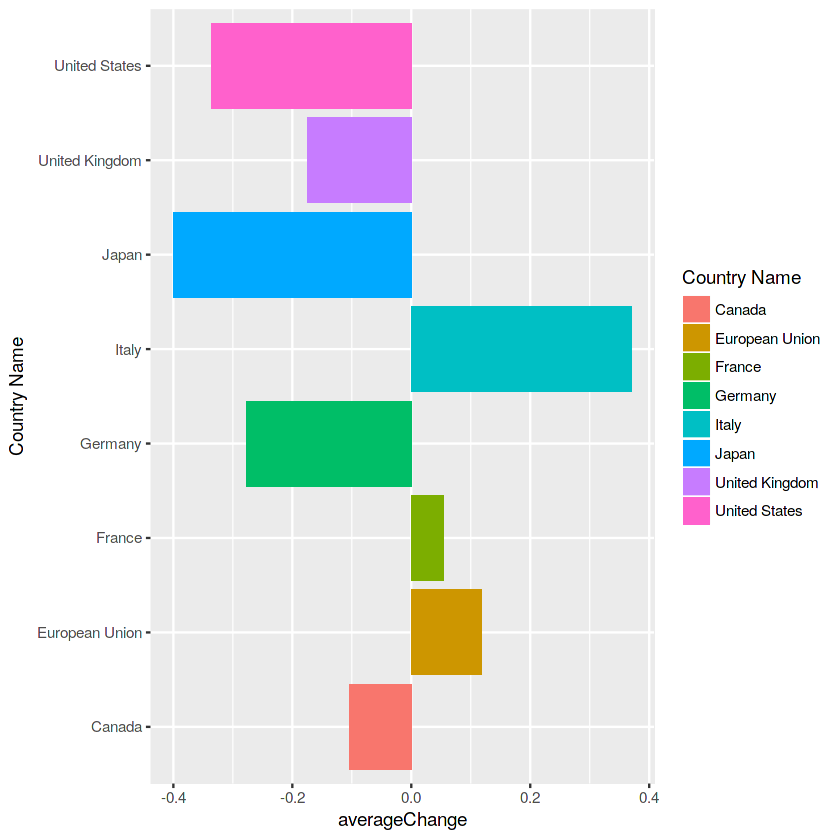

In [13]:
ggplot(pcUnemG7) + geom_bar(mapping = aes(x = `Country Name`, y = `averageChange`,
        fill = `Country Name`), stat = "identity") + coord_flip()

From the histogram, it is clear that most G7 countries were able to decrease the unemployment rate after 2010. The biggest reduction was from Japan. Interestingly, Italy had a large unemployment gain. This can be attributed to the EU bailout issue. Does this signal a change in the membership of G7? Let us keep paying attention to the news. 

## Question 3: Can we depict global employment data using a map?

As a complete beginner to data science and data analysis via R, this was quite a challenge for me. However, I realized that the rworldmap package provides easy to use functions that can make this very easy.

Firstly, we need to join the countries to the map. Fortunately, the World Bank datasets utilize ISO3 code to distinguish the countries. Thus, we can accomplish this task by using the following function:

In [17]:
data <- data %>% mutate(averageChange = (`2014` - `2010`)/`2014`)
mapped_data <- joinCountryData2Map(data, joinCode = "ISO3",   nameJoinColumn = "Country Code")

174 codes from your data successfully matched countries in the map
45 codes from your data failed to match with a country code in the map
69 codes from the map weren't represented in your data


The 45 codes from the data that didn't match are the classification groups, like low income countries or fragile countries.

Now, we can create a map using the following function:

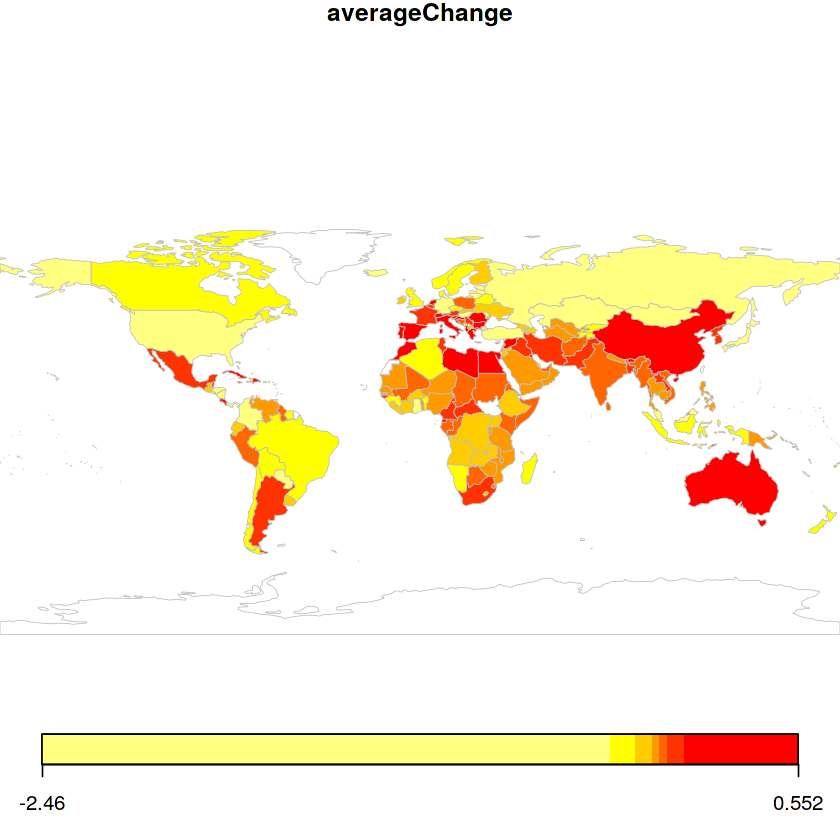

In [18]:
par(mai=c(0,0,0.2,0),xaxs="i",yaxs="i")
mapCountryData(mapped_data, nameColumnToPlot = "averageChange")

The legend depicts the percent change in unemployment. This map shows us a few interesting things:

1. Asian countries have increased unemployment. This took me by surprise, as I believed that these countries still made large economic advances. Maybe, we should conduct more detailed analyses on this.
 
2. European countries have increased unemployment. This trend did not cause any surprises, as they were hit particularly hard by the recession and have taken time to recover.
 
3. Northern countries have done well in terms of unemployment decreases. Could this be a product of the concept of a global north and a global south?

# Future considerations.

As my first EDA of a dataset, I certainly learned a lot about plotting and what is most useful to show trends. Specifically, I learned a lot about mapping data. I would like to do the following in the future:

1. Investigate how unemployment changes in specific continents: I could make a simple animation, or create something more interesting like this analysis of population growth by Hans Rosling: (https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen)

2. During this time period, there were a number of countries, such as Greece, Italy and Spain that nearly defaulted. I would like to do some detailed analysis on these countries

3. There were several observations in the dataset that were classifications rather than countries. My analysis ignored these observations. In future analysis, I would like to examine these observations closely. 